In [0]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

In [0]:
rose = upload_files();

Rose uploaded:  15
First rose namefile: 22679076_bdb4c24401_m.jpg


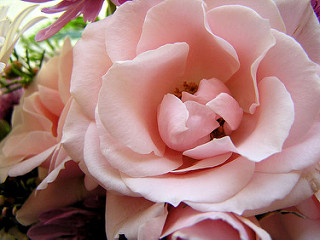

In [31]:
from IPython.display import Image, display

print("Rose uploaded: ",len(rose))
print("First rose namefile:",rose[1])
display(Image(rose[0]))

In [0]:
!pip install "tensorflow>=1.7.0"
!pip install tensorflow-hub

In [0]:
import json
import numpy as np
from skimage import io, data, transform
import requests

import tensorflow as tf
import tensorflow_hub as hub

In [0]:
sess = tf.InteractiveSession()

mobilenet = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v1_100_128/classification/1")
height, width = hub.get_expected_image_size(mobilenet)

In [0]:
imgs = tf.placeholder(tf.float32, shape=(None, height, width, 3))
logits = mobilenet(imgs)
y = tf.nn.softmax(logits)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


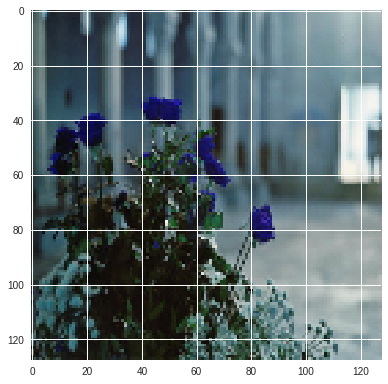

In [29]:
import cv2

img_rose = transform.resize(cv2.imread(rose[2]), [height, width])
io.imshow(img_rose)

In [0]:
url = "https://gist.githubusercontent.com/akimach/c11bb89017adcc3f1d38e818ac396892/raw/1bfd2b98dfb4c9c3c4d66778ef945b2c8b6c62c3/imagenet1000_clsid_to_human.json"
imagenet_100_cls_id = requests.get(url).json()

In [30]:
tf.global_variables_initializer().run()
y_pred = sess.run(y, feed_dict={imgs: [img_rose]})
imagenet_100_cls_id[str(np.argmax(y_pred))]

'pirate, pirate ship'